<a href="https://colab.research.google.com/github/bnf99/FiscaComputacional1/blob/main/ProyectoDOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diferencias finitas.

## Deducción:

Tenemos la ecuación:
 
$$\frac{\partial \rho(x,t)}{\partial t} = D\frac{\partial^{2}\rho(x,t)}{\partial^{2} x}$$

con:

> $\rho(0,t)=\rho(L_{x},t)=0$

> $ \rho(x,0)=Ae^{\frac{-(x-x_{0})^{2}}{l}}$

Dicha ecuación la podemos expresar de la forma:
 
$$\frac{\partial^{2}\rho(x,t)}{\partial^{2} x}=\frac{1}{D}\frac{\partial \rho}{\partial t}$$

Si utilizamos series de Taylor de orden 2 para la parte espcial tenemos se tiene:

$$\rho(x+\Delta x,t)=\rho(x,t)+\frac{\partial \rho}{\partial x}\Delta x+\frac{1}{2}\frac{\partial^{2}\rho }{\partial x^{2}}\Delta x^{2}+...$$

$$\rho(x-\Delta x,t)=\rho(x,t)-\frac{\partial \rho}{\partial x}\Delta x+\frac{1}{2}\frac{\partial^{2} \rho}{\partial x^{2}}\Delta x^{2}+...$$

Si sumamos las ecuaciones tenemos:

$$\frac{\partial^{2}\rho}{\partial x^{2}}= \frac{\rho(x+\Delta x,t)+\rho(x-\Delta x,t)-2\rho(x,t)}{\Delta x^{2}} $$

Utilizando series de Taylor de orden 2 para la parte temporal tenemos:

$$\rho(x,t+\Delta t)=\rho(x,t)+\frac{\partial \rho}{\partial t}\Delta t+\frac{1}{2}\frac{\partial^{2}\rho }{\partial t^{2}}\Delta t^{2}+...$$

$$\rho(x,t-\Delta t)=\rho(x,t)-\frac{\partial \rho}{\partial t}\Delta t+\frac{1}{2}\frac{\partial^{2}\rho }{\partial t^{2}}\Delta t^{2}+...$$

Si restamos ambas ecuaciones tenemos:

$$\frac{\partial \rho}{\partial t}=\frac{\rho(x,t+\Delta t)-\rho(x,t-\Delta t)}{2\Delta t}$$

De esta forma si convinamos ambas relaciones llegamos a:

$$\frac{\rho(x+\Delta x,t)+\rho(x-\Delta x,t)-2\rho(x,t)}{\Delta x^{2}}=\frac{1}{D}\frac{\rho(x,t+\Delta t)-\rho(x,t-\Delta t)}{2\Delta t}$$

Simplificando y utilizando $\phi=\frac{\Delta x^{2}}{2D\Delta t}$ se llega a:

$$\rho(x,t) = \frac{1}{2}[\rho(x+\Delta x,t)+\rho(x-\Delta x,t)-\phi[\rho(x,t+\Delta t)-\rho(x,t-\Delta t)]]$$

De forma matricial se tiene:

$$\rho_{i,k} = \frac{1}{2}[\rho_{i+1,k}+\rho_{i-1,k}-\phi[\rho_{i,k+1}-\rho_{i,k-1}]]$$


## Pseudocódigo:

1. Se define una función que permita evaluar la condición inicial del problema, $ \rho(x,0)=Ae^{\frac{-(x-x_{0})^{2}}{l}}$.

2. Se crea una función que aproxima el valor de rho y la diferencia para todos los puntos del mallado utilizando la ecuacción previamente establecida, $\rho_{i,k} = \frac{1}{2}[\rho_{i+1,k}+\rho_{i-1,k}-\phi[\rho_{i,k+1}-\rho_{i,k-1}]]$.

3. Se crea una función que determine la solución por medio de diferencias finitas.

4. Se establece el mallado y los parámetros del problema.

5. Se establece los parámetros de la simulación y se aproximan los valores.

6. Se crea una visualización en 2D  y 3D de los resultados obtenidos por medio de superficies de contorno.

In [39]:
"""
Librerías
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [40]:
def Rho_0 (x,A,x0,l):
  rho = A*np.exp(-1*(x-x0)**2/l)
  return rho

In [42]:
def IterarMalla(malla0,iter,pMalla,phi):
  malla = malla0
  dicDif = {}
  for j in range(iter):
    listaDif = []
    for i in range(1,pMalla-1):
      for k in range(1,pMalla-1):
        mallaAnterior = malla[i,k]
        malla[i,k]=0.5*(malla[i+1,k]+malla[i-1,k]-phi*(malla[i,k+1]-malla[i,k-1]))
        dif = abs(malla[i,k]-mallaAnterior)
        if dif>0:
          listaDif.append(dif)
    dicDif[j] = np.array(listaDif)
  key = list(dicDif.keys())[-1]
  array= dicDif[key]
  average = np.average(array)
  return malla, average

In [43]:
def Rho_dif_finitas(x,iter,A,x0,l,D,Lx,Lt,pMalla):
  delta_t = Lt/pMalla
  delta_x = Lx/pMalla
  phi = (delta_x**2)/(2*D*delta_t)
  malla = np.zeros((pMalla,pMalla))
  malla[0] = Rho_0(x,A,x0,l)
  a, d =IterarMalla(malla,iter,pMalla,phi)
  return a, d

In [165]:
"""
Parámetros del problema 
"""
D = 0.5
Lx = 10
A = 2
x0 = 5
l = 1.5

"""
Parámetros simulación
"""
iter=  15
Lt =   3
pMalla=100

"""
Mallado
"""
x = np.linspace(0,Lx,pMalla)
t = np.linspace(0,Lt,pMalla)
X,T = np.meshgrid(x,t)

In [166]:
%%time
rho_finitas, diferencias = Rho_dif_finitas(x,iter,A,x0,l,D,Lx,Lt,pMalla)

CPU times: user 408 ms, sys: 0 ns, total: 408 ms
Wall time: 411 ms


In [167]:
diferencias

0.0008190327885476916

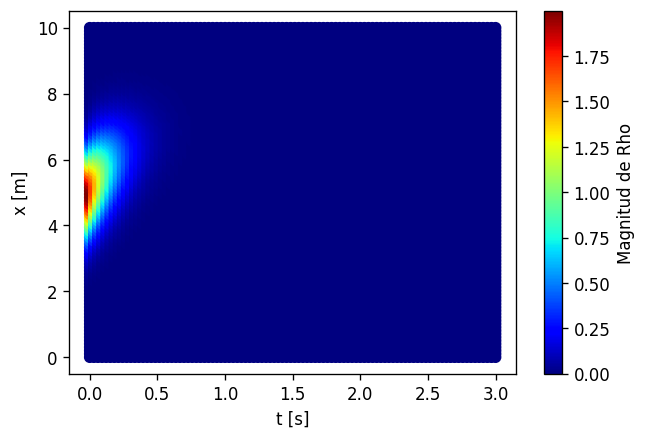

In [168]:
"""
Representación en 2D por medio de superficies de contorno.
"""
fig = plt.figure(dpi = 120,)
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.scatter(T,X,c=rho_finitas,cmap="jet")
plt.colorbar(label="Magnitud de Rho")
plt.show()

In [86]:
"""
Representación en 3D de los resultados.
"""
df2 = pd.DataFrame(rho_finitas,index=x,columns=t)
fig = go.Figure(data=[go.Surface(z=df2.values)])
fig.update_layout(scene = dict(
                    xaxis_title='x [punto]',
                    yaxis_title='t [punto]',
                    zaxis_title='Rho'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.update_layout(title='Rho(x,t)', autosize=True,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()